<a href="https://colab.research.google.com/github/brianyulongzhou/ps2/blob/main/Lab_3_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Go to `File` $\rightarrow$ `Save a copy in Drive` to save an editable version of this document in your own Google Drive.

## Comparing Data to Models

In the previous lab, we learned how to compare measured quantities based on their uncertainties. In this lab, we will expand this framework, and compare our experimental results to theoretical predictions. Based on these comparisions, we'll be able to see if our measurement is consistent or inconsistent with our theoretical predictions. If they are inconsistent, we'll consider any underlying assumptions in our model, and revise our model (or our experimental procedure!) accordingly.

# Define helper functions

Run the below cell to define a few functions that you'll use later:


Here is a list of the functions you will use in labs and how to use them:

*   `get_pvalue(ss_value)`: Outputs: a 2-tailed p-value from the input comparision test value
*   `gaussian_profile(x_variable, mean, stdev)`: Outputs: Gaussian curve corresponding to `variable` for given `mean` and `stdev`
*   `compare_data_to_model_plot(measurements, theory, theory_err)`: Outputs a plot comparing your data (`measurements` to your theoretical value.

In [ ]:
#Don't edit this cell!!
#Define helper functions

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#to calculate a 1-tailed p-value from a s.s. value call the function pvalue_1tailed (whose input is an s.s. value)
def get_pvalue(ss_value):
    #print('p-value:', stats.norm.sf(abs(ss_value)))
    return 2*stats.norm.sf(abs(ss_value))
    
def gaussian_profile(x, mean, std):
  return 1/np.sqrt(2*np.pi*std**2)*np.exp(-1/2*(x-mean)**2/std**2)

def compare_data_to_model_plot(measurements, theory, theory_err):

  fig, ax = plt.subplots()
  ax.hist(measurements, density = True, color='blue', alpha = 0.5, label = 'data')
  ylimits = ax.get_ylim()
  #ax.vlines(theory, *ylimits, 'r', linestyle='--', label = 'prediction')
  #ax.axvspan(theory - theory_err, theory + theory_err, color='red', alpha= 0.5)

  ax.errorbar(theory,gaussian_profile(measurements.mean(), measurements.mean(), measurements.std()),
              xerr =theory_err, markersize = 16, fmt = '.r', capsize=8,
              label = 'prediction')


  ax.set_ylim(*ylimits)

  xlimits =ax.get_xlim()
  xplot = np.linspace(*xlimits)
  gaus_meas = gaussian_profile(xplot, measurements.mean(), measurements.std())
  ax.plot(xplot, gaus_meas, '--k', alpha=0.75, label = 'distribution of data')
  ax.errorbar(measurements.mean(), gaus_meas.max(), xerr = measurements.std()/np.sqrt(len(measurements)), markersize = 16, fmt = '.k', capsize=8)
 
  ax.set_xlim(*xlimits)

  ax.legend()
  return


In [ ]:
get_pvalue(2)

0.04550026389635839


## The Logistics

Edit this cell and add the names of your group memembers here:

>> Lab member 1:

>> Lab member 2:

>> Lab member 3:

* As you go through this document, be sure to answer any questions posed in a text cell where indicated. Your text should be preceeded by the double `>>` as shown above.
* At the end of the lab, you'll download this notebook and then upload it to Canvas/Gradescope *before you leave*. 

#Review

## The Gaussian distribution

In Lab 2, we saw that all measurements are subject to random variations due to a variety of physical effects. Therefore, it is useful (and indeed, often necessary) to take multiple measurements of a given quantity. Instead of simply measuring a single value, we are instead measuring a *distribution* of values comprised of the "true" value, plus the random variations.

In cases where the quantity you are interested in is the sum of *several* random variables, the quantity will be described by a *Gaussian distribution*. A Gaussian is characterized by its mean $\mu$ and its standard deviation $\sigma$. Mathematically, it looks like this:

$$G(x,\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{(x - \mu)^2}{2{\sigma}^2}\right)}$$

The Gaussian distribution is plotted below. Note that 68% of the area under the curve falls within 1$\sigma$ of the mean, 95% of the area under the curve is within 2$\sigma$ of the mean, and 99.7% of the area under the curve is within 3$\sigma$ of the mean. These areas under the the curve correspond to probabilities: For instance, if you measure a Gaussian random variable $x$, there is a 95% chance that $|x- \mu| \leq 2\sigma$, and thus a 5% chance that $|x- \mu| > 2\sigma$.



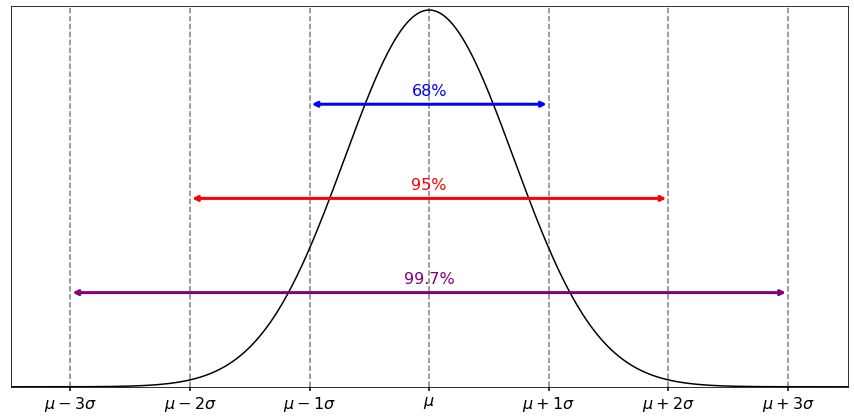

## Statistical significance and p-value:

As we saw above, we can determine the probability of measuring a value greater than or equal to a given limit by taking the area under curve. For instance, the probability of measuring a value at least $1.5\sigma$ greater than the mean is about 7%. We can find p-values by hand by taking integrals of the Gaussian. However, we live in the future, so we can make Python do this for us.

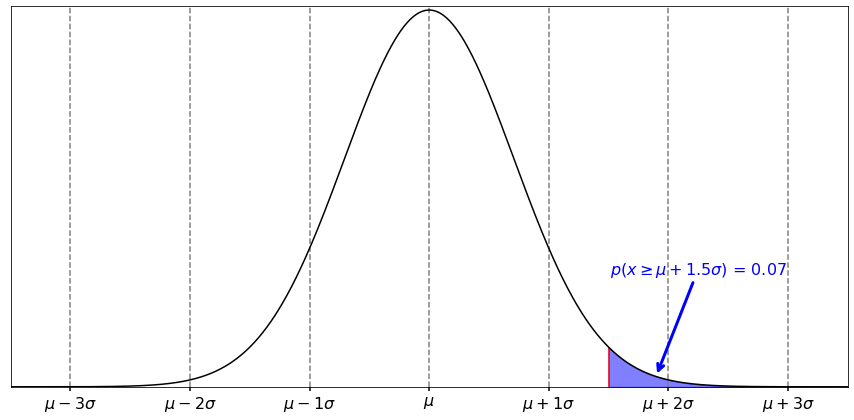

## How to interpret p-value

In research papers, you may have seen authors quantitify their results using a *p-value*. The p-value is the probability that a reported result was measured purely by chance.

For instance, consider a medical study in which outcomes are measured for patients who received an experimental drug vs. patients who recieved a placebo. The researchers measuare that patients who recieved the drug had, on average, better outcomes than patients who recieved the placebo. **The p-value is the probability of measuring this difference in patient outcome assuming that thet drug had no actual effect.**

If the p-value is high, there is a high probability that the measured result was obtained through random chance, and the researchers cannot conclude that the drug made a significant difference. If the p-value is low, there is a low probability that the measured results was obtained through random chance, and the researchers could conclude that the drug made a significant difference.

#Activity 1: America's Next Top Model

Consider the below setup: A ramp sits on a table: the bottom of the ramp is a height $H$ above the ground. A ball is placed on the ramp, and is released from rest a distance $h$ above the bottom of the ramp. It moves down the ramp, and flies off the table. The ball lies through the air, traveling a horizontal distance $L$, before landing on the ground. A schematic of the set-up is shown below:

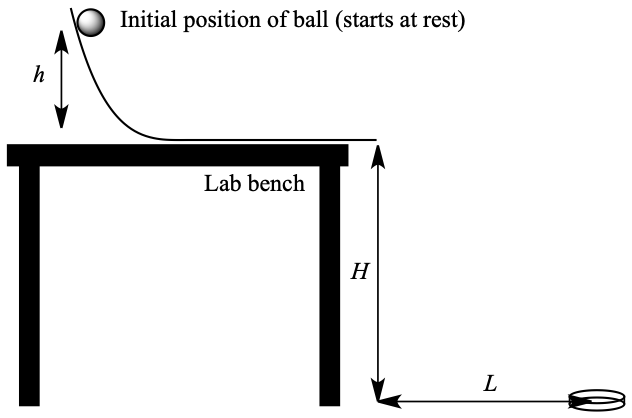

Using your knowledge of physics, come up with a mathematical model to predict $L$, the distance away from the table where the ball will land. (It will probably be easiest to do this on a whiteboard or on a separate piece of paper!) Your model for $L$ should be in terms of $h$, $H$, and any other relevant parameters or physical constants.

Once you have come up with a model, write it up in the cell below. (You can have a TF help with this if needed!)

>> Record your model below:
>> $$L(H,h) = ???$$

Once you have come up with a model for $L$ in terms of $H$ and $h$ find $\delta L$, the expected uncertainty on $L$. You *could* use error propogation to do so, given measured uncertainties on $H$ and $h$ ($\delta H$ and $\delta h$, espectively) to so.

**However, let's think about our experiment:**

Your goal is to get the ball into a petri dish. If the ball can land *anywhere* in the petri dish, how precise does your prediction of $L(H,h)$ need to be? Explain your reasoning. Talk with a TF if you aren't sure.

>>$$\delta L = ???$$

>>Explain your reasoning here

## Test Your Model

Now, test your model! Measure $H$ and $h$, and use these measurements to calculate your model's preducted value of $L$ (with uncertainty!)

In [ ]:
##Record your measurements below
H = ... #your value of H
deltaH = ... #the uncertainty on H
h = ... #your value of h
deltah = ... #the uncertainty on h

##Calculate predicted value of L +/- delta L below
Lmodel = ... #your predicted value of L
deltaLmodel = ... #your predicted uncertainty on L

## print your prediction (with units!)

**Now take data!**

Place and tape a piece of paper on the ground where you expect the ball to land. Mark the predicted landing point and the calculated uncertainty, then place the carbon paper on top of the paper, carbon (dark-side) down.

Now, launch your ball from height $h$ several times (perform *at least 10 trials*). (You don't need to move the paper at all - the carbon paper will make a mark where the ball landed each time.) After you've finished all your trials, record your data in the next cell. Calculate the mean and uncertainty of the mean for these measured values.

In [ ]:
Lmeasure = np.array([...]) #record your measurements here, remember units!

##calculate the mean of your measured values

Lmean = ...

##calculate the uncertainty of the mean

deltaLmean = ...


## Interpret your results

Now, it is time to make a decision! Is your predicted value consistent with your data, or do you need to reject your model?

In the below cell, do a comparision test between your measured and predicted value. The cell below will also calculate a p-value from your c.t. value.

In [ ]:
##compute a comparision test between your predicted and measured value.

ct = ...

print('The comparison test value is', ct)

##compute a p-value for this comparision

print(get_pvalue(ct))

##make a nice plot comparing your measurements, their mean, and their uncertainty to your prediction
compare_data_to_model_plot(Lmeasure, Lmodel, deltaLmodel)

Is your predicted value of $L$ (based on your numerical model) consistent with your experimental results? How sure you are? (Be quantiative! Use the plot and p-value. You can use the ct value as guidance, but the p-value is much more rigorous.) 

Given the plot of your data and the predicted value above, does this make sense?

>>Answer here

## Revise and Repeat!

##If your data is not consistent with your model:

**Don't dispair! This is expected. You're doing science, and finding discrepancies between theory and experimental is how we learn.**

If your theoretical model and experimental results do not agree, then it is likely that your model is incomplete. Go back and consider the assumptions underling your model: are there any physical processes at work that you have not included in your model? Does your model make any assumptions that may be incorrect? You should also consider the variables in your model - are you sure you measured what you think you measured?

After you've identified these incorrect assumptions, go back and revise your model. **Be sure to discuss your new model with a TF!**

Record your new theoretical model below:

$$L_{new}(H, h, ...) = ??? $$

What revisions have you made to your model? Why?

>> Your answer here




Now, go back and repeat the above proces! Calculate a new predicted value of $L$ given $H$, $h$, and any other relevant variables. Compare this new value of $L$ to your measured data - Is this new value of consistent with your measurements?

You may need revise your model a few times - that is okay! (In fact, it's how real scientists make progress!) You should feel free to add more code and text cells below, and copy and paste any code you used previously. *Talk to a TF if you need any help with this process!*

In [ ]:
##Your code here!

Add any other information (and/more code/text cell) you need here!

## If your data is consistent with your model:

Congratulations! **Make sure you discuss the final version of your model, as well as your results with a TF.** If the TF agrees with your findings, **place a petri dish where you expect the ball to land**, and then run a trial with the TF present. If the ball lands in the petri dish, then you are done!

>> Report your p-value and discuss your result here. Why did you accept your model?

# How to submit

- Go to `File` $\rightarrow$ `Download` $\rightarrow$ `Download .ipynb` 
- Upload the file via the Canvas assignment (it will take you to Gradescope.)
- IMPORTANT: Only upload ONE COPY, making sure to add all group members to the submission!
-Please complete the Lab 1 Post-Lab Survey (on Canvas) before you leave lab!